In [10]:
import json
import matplotlib.pyplot as plt
import math
from scipy import stats

In [11]:
with open("out/first.json") as f:
    data = json.loads(f.read())

In [12]:
def latlongdist(lat1, lon1, lat2, lon2) :
  dy = (lat2-lat1)*math.pi/180*6.371e6;
  dx = (lon2-lon1)*math.pi/180*math.sin((90-lat1)*math.pi/180)*6.371e6;
  return dx, dy;

def distlatlong(lat1, lon1, dy, dx):#fix deg-rad you idiot
  lat2 = lat1+dy/6.371e6;
  lon2 = lon1+dx/(math.sin((90-lat1)*math.pi/180)*6.371e6);
  return lat2, lon2;


In [13]:
filtered = list(filter(lambda x:x["frame_type"]=="data_message" and x["name"]=="record" and x["fields"][1]["value"] is not None, data))

In [14]:
origin = (filtered[0]["fields"][1]["value"], filtered[0]["fields"][2]["value"])

In [15]:
mine = [{"lat":i["fields"][1]["value"], 
        "long":i["fields"][2]["value"], 
        "time":i["fields"][0]["raw_value"]+631065600, 
        "dx":latlongdist(origin[0], origin[1], i["fields"][1]["value"], i["fields"][2]["value"])[0],
        "dy":latlongdist(origin[0], origin[1], i["fields"][1]["value"], i["fields"][2]["value"])[1],
        "acc":0,
        } for i in filtered]

{'lat': 55.65834282897413,
 'long': 12.077784016728401,
 'time': 1597568966,
 'dx': 150.09099074571802,
 'dy': -252.476281587687,
 'acc': 0}

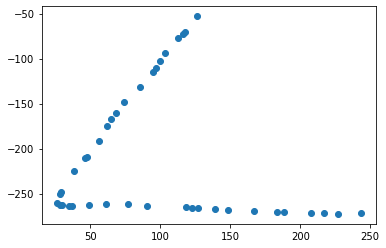

In [29]:
fig = plt.figure()
plt.ion()

ax = fig.add_subplot(111)

minecrop = mine[380:420]
ax.scatter([i["dx"] for i in minecrop], [i["dy"] for i in minecrop])
# ax.scatter(posnon[:,0], posnon[:,1])
plt.show()

In [30]:
def edgelinker(listy):
    if len(listy)<3:
        return listy:
    start, end = listy[0], listy[-1]
    #find a point that does not lie on the line between the points start and end
    #we probably want to start halfway between and work out to get higher quality ones
    #how do you know if a point is on that line? idk chief

    if we find a point:
        before = listy[:point]
        after = listy[point:]
        return edgelinker(before) + edgelinker(after)
    else:
        return listy

565